# CSCI-B 505 Applied Algorithms - Assignment 5

### Name : Akhila Sakiramolla (asakiram@iu.edu)
### UID : 2000886005
### Assignment partner : Roopank Kohli (rookohli@iu.edu) 

## Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import random

## Problem 1: Pattern-matching: The brute-force

### Problem 1.1: The brute-force pattern-matching algorithm


Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in Ω(dp) time.The lengths of D and P are d and p, respectively.

The brute algorithm for pattern matching compares the given pattern to the text by each character until matching characters are found. 

Worst case scenario is when the pattern is compared to each substring of length of pattern. If length of text is 'M' and length of pattern is 'N', then the time complexity is O(MN).

Best case scenario is when the pattern is found in the first N positions of text. Here the time complexity is O(M).

In the below code, I'm returning the first index where the pattern is found.

In [2]:
def bruteForceAlgo(D,P):
  # Calculating the lengths of text and pattern
  n,m = len(D), len(P)

  # Intialising a variable k to to compare elements in pattern with text 
  for i in range(n-m+1):
    k = 0
    # while k < m:
    while (k < m) and (D[i+k] == P[k]):
      # If the elements match move to next element
      k += 1

    # If the elements are matched return the index
    if k == m:
      print("Pattern identified in the Text at index : ",i)

In [3]:
# Code testing
D = 'abababsbcabask'
P = 'aba'
print("Text : ",D)
print("Pattern : ",P)
bruteForceAlgo(D,P)
print("\n")

txt = "AABAACAADAABAAABAA"
pat = "AABA"
print("Text : ",txt)
print("Pattern : ",pat)
bruteForceAlgo(txt,pat)

Text :  abababsbcabask
Pattern :  aba
Pattern identified in the Text at index :  0
Pattern identified in the Text at index :  2
Pattern identified in the Text at index :  9


Text :  AABAACAADAABAAABAA
Pattern :  AABA
Pattern identified in the Text at index :  0
Pattern identified in the Text at index :  9
Pattern identified in the Text at index :  13


### Problem 1.2: Python’s str class and pattern-matching

In this part, you are asked to modify three pattern matching programs given to you (See appendix). Run your modified programs for varying-length patterns and show your results.

The count method in Python’s str class takes a text D and a pattern P and returns the
maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcdcdc’.count(‘cdc’) returns 2.


#### 1. Brute-force pattern-matching

For the above Brute force code I have initialised a counter to count the number of occurences of the pattern and increment it everytime the pattern is found.

In [44]:
def bruteForceAlgo(D,P):
  # Calculating the lengths of text and pattern
  n,m = len(D), len(P)
  i = 0
  # Intialising a counter to count number of occurences
  pat_count = 0

  # Intialising a variable k to to compare elements in pattern with text 
  while i < (n-m+1):
    k = 0
    while (k < m) and (D[i+k] == P[k]):
      # If the elements match move to next element
      k += 1

    # If the elements are matched return the index
    if k == m:
      print("Pattern identified in the Text at index : ",i)
      # Increamenting the pattern counter when pattern is found and resetting the indices
      pat_count += 1
      i += m -1
    i += 1
  print("The number of ocuurences is : ",pat_count)

In [45]:
# Code testing
D = 'abababsbcabask'
P = 'aba'
print("Text : ",D)
print("Pattern : ",P)
bruteForceAlgo(D,P)
print("\n")

txt = "AABAACAAABAAABAA"
pat = "AABA"
print("Text : ",txt)
print("Pattern : ",pat)
bruteForceAlgo(txt,pat)

Text :  abababsbcabask
Pattern :  aba
Pattern identified in the Text at index :  0
Pattern identified in the Text at index :  9
The number of ocuurences is :  2


Text :  AABAACAAABAAABAA
Pattern :  AABA
Pattern identified in the Text at index :  0
Pattern identified in the Text at index :  7
Pattern identified in the Text at index :  11
The number of ocuurences is :  3


#### 2. Boyer-Moore program

Boyer–Moore algorithm searches for the occurrences of the pattern in the text by performing character comparisons at different positions. Unlike Brute force algorithm where it compares all alignments, Boyer moore algorithm uses the comparison information gained already to skip as many positions as possible.

If length of text is 'M' and length of pattern is 'N', then the worst case time complexity is O(MN).

In the Boyer Moore algorithm code I have initialised a counter to count the number of occurences of the pattern and increment it everytime the pattern is found. After the pattern is found, I reset the indices of text and pattern to skip required number of positions.




In [46]:
def boyerMooreAlgo(D,P):
  # Calculating the lengths of text and pattern
  n,m = len(D), len(P)
  if m == 0:
    return 0
  
  # Initialising a dictionary to store info about elements position in the pattern
  pat_dict = {}
  for k in range(m):
    pat_dict[P[k]] = k
  
  i = m-1
  k = m-1
  pat_count = 0

  while i < n:
    if D[i] == P[k]:
      if k == 0:
        print("Pattern identified in the Text at index : ",i)
        # Increamenting the pattern counter when pattern is found and resetting the indices
        pat_count += 1
        i += m-1
        j = pat_dict.get(D[i],-1)
        i += m - min(k, j+1)
        k = m-1
        continue
      else:
        i -= 1
        k -= 1
    else:
      j = pat_dict.get(D[i],-1)
      i += m - min(k, j+1)
      k = m-1

  print("The number of ocuurences is : ",pat_count)

In [47]:
# Code testing
D = 'abababsbcabask'
P = 'aba'
print("Text : ",D)
print("Pattern : ",P)
boyerMooreAlgo(D,P)
print("\n")

txt = "AABAACAAABAAABAA"
pat = "AABA"
print("Text : ",txt)
print("Pattern : ",pat)
boyerMooreAlgo(txt,pat)

Text :  abababsbcabask
Pattern :  aba
Pattern identified in the Text at index :  0
Pattern identified in the Text at index :  9
The number of ocuurences is :  2


Text :  AABAACAAABAAABAA
Pattern :  AABA
Pattern identified in the Text at index :  0
Pattern identified in the Text at index :  7
Pattern identified in the Text at index :  11
The number of ocuurences is :  3


#### 3. KMP program


The KMP algorithm differs from Brute force algorithm by keeping a track of information gained from previous comparisons. It uses the degenerating property i.e., using sub patterns appearing more than once in the pattern. A failuer table is calculated which can be used to skip characters while matching.

If length of text is 'M' and length of pattern is 'N', then the worst case time complexity is O(M).

In the KMP algorithm code I have initialised a counter to count the number of occurences of the pattern and increment it everytime the pattern is found. After the pattern is found, I look up the fail table to calculate the number of positions to skip for the next comparison and accordingly reset the indices.



In [48]:
# Function to compute the fail table for pattern
def compute_kmp_fail(P) :
  # Calculating the length of pattern
  m = len(P)
  fail = [0]*m
  j = 1
  k = 0
  while j < m :
    if P[j] == P[k]:
      fail[j] = k +1
      j += 1
      k += 1
    elif k > 0:
      k = fail[k -1]
    else :
      j += 1
    return fail

In [49]:
def KMPAlgo(T,P) :
  # Calculating the length of pattern
  n , m = len(T),len(P)
  # Intialising a counter to count number of occurences
  pat_count = 0

  if m == 0:
    return 0
  fail = compute_kmp_fail(P)
  j = 0
  k = 0
  while j < n :
    if T[j] == P[k]:
      if k == m -1:
        print("Pattern identified in the Text at index : ",j-k)
        # Increamenting the pattern counter when pattern is found and resetting the indices
        pat_count += 1
        k = 0
        j = j - fail[k-1] + m - 1
        continue
      j += 1
      k += 1
    elif k > 0:
      k = fail[k -1]
    else :
      j += 1
  print("The number of ocuurences is : ",pat_count)

In [51]:
# Code testing
D = 'abababsbcabask'
P = 'aba'
print("Text : ",D)
print("Pattern : ",P)
KMPAlgo(D,P)
print("\n")

Text :  abababsbcabask
Pattern :  aba
Pattern identified in the Text at index :  0
Pattern identified in the Text at index :  9
The number of ocuurences is :  2




## Problem 2: Experimental Analysis of Pattern-Matching Algorithms


### 1. Number of character comparison

In [23]:
# Brute force
def find_brute(T, P):
  c = 0
  n, m = len(T), len(P)
  # every starting position
  for i in range(n - m + 1):
      k = 0
      # conduct O(k) comparisons
      while k < m and T[i + k] == P[k]:
          c+=1
          k += 1
      c+=1
      if k == m:
          c -= 1
          return c

  return - 1

In [24]:
# Boyer - Moore
def find_boyer_moore(T, P):
  c=0
  n, m = len(T), len(P)
  if m == 0:
      return 0
  last = {}
  for k in range(m):
      last[P[k]] = k
  i = m - 1
  k = m - 1
  while i < n:

      # If match , decrease i,k
      if T[i] == P[k]:
          c+=1
          if k == 0:
              return c

          else:
              i -= 1
              k -= 1

      # Not match , reset the positions
      else:
          j = last.get(T[i], -1)
          i += m - min(k, j + 1)
          k = m - 1
          c+=1
  return c

In [25]:
def compute_kmp_fail(P):
  m = len(P)
  fail = [0] * m
  j = 1
  k = 0
  while j < m:
      if P[j] == P[k]:
          fail[j] = k + 1
          j += 1
          k += 1
      elif k > 0:
          k = fail[k - 1]
      else:
          j += 1
  return fail

In [26]:
def find_kmp(T, P):
  c=0
  n, m = len(T), len(P)
  if m == 0:
      return 0
  fail = compute_kmp_fail(P)
  # print ( fail )

  j = 0
  k = 0
  while j < n:
      if T[j] == P[k]:
          c+=1
          if k == m - 1:
              return c
          j += 1
          k += 1
          c+=1
      elif k > 0:
          k = fail[k - 1]
          c+=1
      else:
          j += 1
          c+=1
  return c

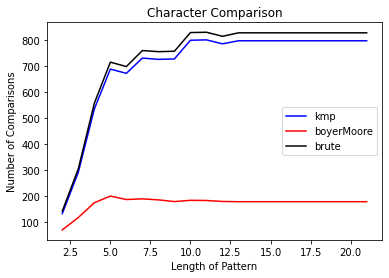

In [33]:
if __name__ == "__main__":
  bruteWordList, bruteList, bruteLength = [], [], []
  boyerMooreWordList, boyerMooreList, boyerMooreLength = [], [], []
  kmpWordList, kmpList, kmpLength = [], [], []

  with open("Q2.txt") as f:

      textlines = f.read()
      words = list(map(str, textlines.split()))

  for j in range(2, 22):
      counter = 0
      for counter in range(100):

          # print random string
          word = random.choice(words)
          if len(word) == j:

              brute_result = find_brute(textlines, word)
              boyer_moore_result = find_boyer_moore(textlines, word)
              kmp_result = find_kmp(textlines, word)
              bruteWordList.append(brute_result)
              boyerMooreWordList.append(boyer_moore_result)
              kmpWordList.append(kmp_result)


      bruteValue = (sum(bruteWordList) / len(bruteWordList))
      bruteList.append(bruteValue)

      bmValue = (sum(boyerMooreWordList) / len(boyerMooreWordList))
      boyerMooreList.append(bmValue)

      kmpValue = (sum(kmpWordList)/len(kmpWordList))
      kmpList.append(kmpValue)

      bruteLength.append(j)

  plt.xlabel('Length of Pattern')
  plt.ylabel('Number of Comparisons')
  plt.title('Character Comparison')

  
  (plt.plot(bruteLength, bruteList, label = 'brute',color='black'))
  (plt.plot(bruteLength, boyerMooreList, label = 'boyerMoore',color='red'))
  (plt.plot(bruteLength, kmpList, label = 'kmp',color='blue'))
  plt.legend()
  plt.show()

From the above graph, we notice that Brute algorithm has highest number of comparisons followed by KMP and Boyer Moore algorithms.

### 2. Relative speed comparison

In [52]:
# Brute force
def find_brute (T , P ) :
  stime = time.time_ns()
  n , m = len( T ) , len ( P )
  # every starting position
  for i in range (n - m +1) :
      k = 0
      # conduct O(k) comparisons
      while k < m and T [ i + k ] == P [ k ]:
          k += 1
      if k == m :
          return float(time.time_ns()-stime)
  return -1

In [53]:
# Boyer - Moore
def find_boyer_moore (T , P ) :
  stime = time.time_ns()
  n , m = len( T ) , len ( P )
  if m == 0:
      return 0
  last = {}
  for k in range ( m ) :
      last [ P [ k ]] = k
  i = m -1
  k = m -1
  while i < n :
      # If match , decrease i,k
      if T [ i ] == P [ k ]:
          if k == 0:
              return float(time.time_ns()-stime)
          else :
              i -= 1
              k -= 1
      # Not match , reset the positions
      else :
          j = last . get ( T [ i ] , -1)
          i += m - min (k , j +1)
          k = m -1
  return -1


In [54]:
# KMP failure function
def compute_kmp_fail ( P ) :
  m = len( P )
  fail = [0] * m
  j = 1
  k = 0
  while j < m :
      if P [ j ] == P [ k ]:
          fail [ j ] = k +1
          j += 1
          k += 1
      elif k > 0:
          k = fail [k -1]
      else :
          j += 1
  return fail

In [55]:
# KMP
def find_kmp (T , P ) :
  stime = time.time_ns()
  n , m = len( T ) , len ( P )
  if m == 0:
      return 0
  fail = compute_kmp_fail ( P )
  #print ( fail )
  j = 0
  k = 0
  while j < n :
      if T [ j ] == P [ k ]:
          if k == m -1:
              return float(time.time_ns()-stime)
          j += 1
          k += 1
      elif k > 0:
          k = fail [k -1]
      else :
          j += 1
  return -1


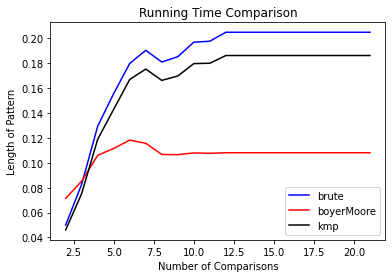

In [56]:
if __name__ == "__main__":
  bruteTimeList, bruteList, bruteLength = [], [], []
  boyerMooreTimeList, boyerMooreList, boyerMooreLength = [], [], []
  kmpTimeList, kmpList, kmpLength = [], [], []

  with open("Q2.txt") as f:
      textlines = f.read()
      words = list(map(str, textlines.split()))

  for j in range(2, 22):
      counter = 0
      for counter in range(100):

          # print random string
          word = random.choice(words)
          if len(word) == j:

              brute_result = find_brute(textlines, word)
              boyer_moore_result = find_boyer_moore(textlines, word)
              kmp_result = find_kmp(textlines, word)

              bruteTimeList.append(brute_result/1000000)
              boyerMooreTimeList.append(boyer_moore_result/1000000)
              kmpTimeList.append(kmp_result/1000000)

      bruteValue = (sum(bruteTimeList) / len(bruteTimeList))
      bruteList.append(bruteValue)

      bmValue = (sum(boyerMooreTimeList) / len(boyerMooreTimeList))
      boyerMooreList.append(bmValue)

      kmpValue = (sum(kmpTimeList) / len(kmpTimeList))
      kmpList.append(kmpValue)

      bruteLength.append(j)

  plt.xlabel('Number of Comparisons')
  plt.ylabel('Length of Pattern')
  plt.title('Running Time Comparison')

  (plt.plot(bruteLength, bruteList, label = 'brute', color='blue'))
  (plt.plot(bruteLength, boyerMooreList, label = 'boyerMoore',color='red'))
  (plt.plot(bruteLength, kmpList, label = 'kmp',color='black'))
  plt.legend()
  plt.show()

## Problem 3: Matrix-chain Multiplication


The matrix-chain multiplication problem: Given a chain of < D1, D2, . . . , Dn > of n matrices fully
parenthesize the product < D1 ·D2 · · · Dn > in a way so that the number of scalar multiplications
is minimized. Each Di has a pi−1 × pi dimension and i = 1, 2, . . . , n.


### 1. The Brute-Force

The brute force algorithm for matrix chain multiplication computes all possible commbinations of paranthesizations and returns the minimum cost of multiplication. 

In the below code, I have split the given sequence into two sequences and then recursively calculated the cost of multiplication for these sequences. Initialised a variable to store minimum cost and compared the calculated costs till the minimum value is found. Finally returning the minimum cost value.

In [34]:
def matChainBF(dim,i,j):
  k = 0
  # Initialising a variable to store minimum cost
  min_cost = 9999999
  if i == j:
    return 0
  
  # Calculating cost of multiplation for different combinations and finding the minimum cost
  for k in range(i,j):
    mat_cost = matChainBF(dim,i,k) + matChainBF(dim,k+1,j) + dim[i-1]*dim[k]*dim[j]

    if mat_cost < min_cost:
      min_cost = mat_cost
  
  return min_cost

In [35]:
# Code testing
arr = [5, 4, 6, 2]
n = len(arr)
print("Minimum number of multiplications is ",matChainBF(arr, 1, n-1))
print("\n")

arr = [1, 2, 3, 4, 3]
n = len(arr)
print("Minimum number of multiplications is ",matChainBF(arr, 1, n-1))

Minimum number of multiplications is  88


Minimum number of multiplications is  30


### 2. Bottom-up Dynamic Programming

In the below code, I'm first initialising two matrices, m - to store the minimum cost of multiplication for different combinations of paranthesization and s - to store the index at which the minimum cost is obtained. Now I split the given sequence into two sequences and then recursively calculated the cost of multiplication for these sequences. Initialised a variable to store minimum cost and compared the calculated costs till the minimum value is found. Finally returned the minimum cost value. I created another function printParanthesis to print the optimum paranthesization.

In [36]:
def printParanthesis(s,i,j):
  paranthesis = ""
  if i == j:
    paranthesis += "A"+str(i)
  else:
        paranthesis += "("
        paranthesis += printParanthesis(s, i, s[i-1][j-1])
        paranthesis += printParanthesis(s, s[i-1][j-1] + 1, j)
        paranthesis += ")"
        
  return paranthesis

In [37]:
def matChainDP(dim_arr,arr_len):
  # Intialising two arrays, m - to store the cost of multiplation and s - to store the index with minimum cost
  m = [[0 for i in range(arr_len)] for j in range(arr_len)]
  s = [[0 for i in range(arr_len-1)] for j in range(arr_len-1)]

  for i in range(1,arr_len):
    m[i][i] = 0

  for l in range(2,arr_len):
    for i in range(1, arr_len - l + 1):
      j = i + l -1
      m[i][j] = 99999
      for k in range(i,j):
        # Calculating the cost for different combinations and finally storing the minimum cost
        mat_cost = int(m[i][k] + m[k + 1][j] + dim_arr[i-1]*dim_arr[k]*dim_arr[j])
        if mat_cost < m[i][j]:
          m[i][j] = mat_cost
          s[i-1][j-1] = k

  return m[1][arr_len-1], printParanthesis(s,1,n-1)

In [38]:
# Code testing
arr = [5, 4, 6, 2]
n = len(arr)
cost, pattern = matChainDP(arr, n)
print("Minimum number of multiplications is ",cost)
print("The paranthesization is ",pattern)
print("\n")

arr = [1, 2, 3, 4, 3]
n = len(arr)
cost, pattern = matChainDP(arr, n)
print("Minimum number of multiplications is ",cost)
print("The paranthesization is ",pattern)

Minimum number of multiplications is  88
The paranthesization is  (A1(A2A3))


Minimum number of multiplications is  30
The paranthesization is  (((A1A2)A3)A4)


### 3. Dynamic Programming with Memoization

In [39]:
def matChainDPM(mem_mat,dim_arr,i,j):
  if (i == j):
    return 0

  if mem_mat[i][j] < 99999:
    return mem_mat[i][j]
  else:
     # Calculating the cost for different combinations and finally storing the minimum cost
    for k in range(i,j):
      mem_mat[i][j] = min(mem_mat[i][j], matChainDPM(mem_mat, dim_arr, i, k) + matChainDPM(mem_mat, dim_arr, k + 1, j)+ dim_arr[i - 1] * dim_arr[k] * dim_arr[j])

  return mem_mat[i][j]

In [40]:
def memoizedMatrix(dim_arr):
  # Creating an nxn array with some value
  arr_len = len(dim_arr)
  m = [[99999 for i in range(arr_len)] for j in range(arr_len)]
  return matChainDPM(m, dim_arr, 1, arr_len-1)

In [41]:
# Code testing
arr = [5, 4, 6, 2]
print("Minimum number of multiplications is ",memoizedMatrix(arr))
print("\n")

arr = [1, 2, 3, 4, 3]
print("Minimum number of multiplications is ",memoizedMatrix(arr))

Minimum number of multiplications is  88


Minimum number of multiplications is  30


## Problem 4: Longest Common Sub-sequence (LCS) Problem

Implement a Python program to solve LCS problem using dynamic programming. Run your program to find the best sequence alignment between DNA strings. Show your results.

Longest Common Sub-sequence (LCS) problem: Given two character strings over some alphabet, find a longest string that is a sub-sequence of given two strings.


In the below code, I first constructed a matrix from bottom corner to find the length of the longest common sub sequence. We check for a match, if found we put the value by incrementing the bottom diagonal value by 1. If not, then we put the value as the maximum value of next right matrix value and next bottom matrix value. We do this till we reach the top of the matrix. To find the LCS, we traverse from the first row and first column till bottom in the similar way. When there is a match we append to an initial empty string and return it.

In [42]:
  def lcs_algo(String1, String2, m, n):
    L = [[0 for x in range(n + 1)] for x in range(m + 1)]

    # Building the matrix in bottom-up way
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                L[i][j] = 0
            elif String1[i - 1] == String2[j - 1]:
                L[i][j] = L[i - 1][j - 1] + 1
            else:
                L[i][j] = max(L[i - 1][j], L[i][j - 1])

    index = L[m][n]

    lcs_algo = [""] * (index + 1)
    lcs_algo[index] = ""

    i = m
    j = n
    while i > 0 and j > 0:

        if String1[i - 1] == String2[j - 1]:

            lcs_algo[index - 1] = String1[i - 1]
            i -= 1
            j -= 1
            index -= 1

        elif L[i - 1][j] > L[i][j - 1]:
            i -= 1
        else:
            j -= 1

    # Printing the sub sequences
    print("String1 : " + String1 + "\nString2 : " + String2)
    print("LCS: " + "".join(lcs_algo))
    print(len(lcs_algo[:-1]))

In [43]:
# Code testing
X = "GGGAGTCGCTGCGCGCTGCCTTCGCCCCGTGCCCCGCTCCGCCGCCGCCTCGCGCCGCCCGCCCCGGCTCTGACTGACCGCGTTACTCCCACAGCCAGCCATGGATGATGATATTGCTGCGCTCGTTGTTGACAATGGCTCCGGTATGTGCAAGGCCGGTTTCGCCGGGGACGATGCCCCCCGTGCTGTGTTCCCATCTATCGTGGGTCGCCCCAGACATCAGGGTGTGATGGTTGGTATGGGCCAGAAAGACAGCTACGTTGGTGATGAAGCCCAGAGCAAAAGAGGTATCCTGACCCTGAAGTACCCCATTGAACACGGTATTGTCACCAACTGGGATGATATGGAGAAGATCTGGCACCACACTTTCTACAATGAGCTGAGAGTAGCCCCTGAGGAGCACCCTGTGCTGCTCACAGAGGCTCCCCTGAACCCCAAAGCCAACAGAGAGAAGATGACACAGATCATGTTTGAGACCTTCAACACCCCAGCCATGTATGTAGCCATCCAGGCTGTGCTGTCCCTGTATGCCTCTGGTCGTACCACTGGTATTGTGATGGACTCTGGTGATGGTGTTACCCACACTGTGCCCATCTATGAAGGCTACGCCCTCCCCCACGCCATCCTCCGTCTGGATCTGGCTGGCCGTGACCTGACGGACTACCTCATGAAGATCCTGACAGAGAGAGGCTACAGCTTCACCACCACAGCCGAGAGAGAAATTGTGCGTGACATCAAGGAGAAGCTGTGCTACGTCGCACTGGATTTCGAGCAGGAGATGGCCACAGCTGCCTCTAGCTCTTCCCTGGAGAAGAGCTATGAACTCCCTGATGGTCAGGTCATCACCATTGGCAATGAGAGGTTCAGGTGCCCCGAGGCCCTCTTCCAGCCATCTTTCTTGGGTATGGAGTCCTGTGGTATCCATGAAACTACCTTCAACTCCATCATGAAGTGTGATGTGGATATCCGTAAGGATCTGTATGCCAACACAGTGCTGTCTGGTGGTACCACAATGTACCCTGGCATTGCTGACAGGATGCAGAAGGAGATCACAGCCCTGGCACCTAGCACAATGAAAATCAAGATCATTGCCCCACCTGAGCGCAAGTACTCTGTCTGGATTGGAGGCTCTATCCTGGCCTCCCTGTCCACCTTCCAGCAGATGTGGATCAGCAAGCAGGAGTATGACGAATCCGGACCCTCCATTGTCCACCGCAAATGCTTCTAAACCGGACTGTTACCAACACCCACACCCCTGTGATGAAACAAAACCCATAAATGCGCATAAAACAAGACGAGATTGGCATGGCTTTATTTGTTTTTTCTTTTGGCGCTTGACTCAGGATTAAAAAACTGGAATGGTGAAGGTGTCAGCAGCAGTCTTAAAATGAAACATGTTGGAGCGAACGCCCCCAAAGTTCTACAATGCATCTGAGGACTTTGATTGTACATTTGTTTCTTTTTTAATAGTCATTCCAAATATTGTTATAATGCATTGTTACAGGAAGTTACTCGCCTCTGTGAAGGCAACAGCCCAGCTGGGAGGAGCCGGTACCAATTACTGGTGTTAGATGATAATTGCTTGTCTGTAAATTATGTAACCCAACAAGTGTCTTTTTGTATCTTCCGCCTTAAAAACAAAACACACTTGATCCTTTTTGGTTTGTCAAGCAAGCGGGCTGTGTTCCCCAGTGATAGATGTGAATGAAGGCTTTACAGTCCCCCACAGTCTAGGAGTAAAGTGCCAGTATGTGGGGGAGGGAGGGGCTACCTGTACACTGACTTAAGACCAGTTCAAATAAAAGTGCACACAATAGA"
Y = "ACAGCACGCTCTCAGCCTTCCTGAGCACCTTTCCTTCTTTCAGCCAACTGCTCACTCGCTCACCTCCCTCCTTGGCACCATGACCACCTGCAGCCGCCAGTTCACCTCCTCCAGCTCCATGAAGGGCTCCTGCGGCATCGGAGGCGGCATCGGGGGCGGCTCCAGCCGCATCTCCTCCGTCCTGGCCGGAGGGTCCTGCCGTGCCCCCAGCACCTACGGGGGCGGCCTGTCTGTCTCCTCTCGCTTCTCCTCTGGGGGAGCCTGCGGGCTGGGGGGCGGCTATGGCGGTGGCTTCAGCAGCAGCAGCAGCTTTGGTAGTGGCTTCGGGGGAGGATATGGTGGTGGCCTTGGTGCTGGCTTCGGTGGTGGCTTGGGTGCTGGCTTTGGTGGTGGTTTTGCTGGTGGTGATGGGCTTCTGGTGGGCAGTGAGAAGGTGACCATGCAGAACCTCAATGACCGCCTGGCCTCCTACCTGGACAAGGTGCGTGCTCTGGAGGAGGCCAACGCCGACCTGGAAGTGAAGATCCGTGACTGGTACCAGAGGCAGCGGCCCAGTGAGATCAAAGACTACAGTCCCTACTTCAAGACCATCGAGGACCTGAGGAACAAGATCATTGCGGCCACCATTGAGAATGCGCAGCCCATTTTGCAGATTGACAATGCCAGGCTGGCAGCCGATGACTTCAGGACCAAGTATGAGCATGAACTGGCCCTGCGGCAGACTGTGGAGGCCGACGTCAATGGCCTGCGCCGGGTGTTGGATGAGCTGACCCTGGCCAGGACTGACCTGGAGATGCAGATCGAAGGCCTGAAGGAGGAGCTGGCCTACCTGAGGAAGAACCACGAGGAGGAGATGCTTGCTCTGAGAGGTCAGACCGGCGGAGATGTGAACGTGGAGATGGATGCTGCACCTGGCGTGGACCTGAGCCGCATCCTGAATGAGATGCGTGACCAGTACGAGCAGATGGCAGAGAAAAACCGCAGAGACGCTGAGACCTGGTTCCTGAGCAAGACCGAGGAGCTGAACAAAGAAGTGGCCTCCAACAGCGAACTGGTACAGAGCAGCCGCAGTGAGGTGACGGAGCTCCGGAGGGTGCTCCAGGGCCTGGAGATTGAGCTGCAGTCCCAGCTCAGCATGAAAGCATCCCTGGAGAACAGCCTGGAGGAGACCAAAGGCCGCTACTGCATGCAGCTGTCCCAGATCCAGGGACTGATTGGCAGTGTGGAGGAGCAGCTGGCCCAGCTACGCTGTGAGATGGAGCAGCAGAGCCAGGAGTACCAGATCTTGCTGGATGTGAAGACGCGGCTGGAGCAGGAGATTGCCACCTACCGCCGCCTGCTGGAGGGCGAGGATGCCCACCTTTCCTCCCAGCAAGCATCTGGCCAATCCTATTCTTCCCGCGAGGTCTTCACCTCCTCCTCGTCCTCTTCGAGCCGTCAGACCCGGCCCATCCTCAAGGAGCAGAGCTCATCCAGCTTCAGCCAGGGCCAGAGCTCCTAGAACTGAGCTGCCTCTACCACAGCCTCCTGCCCACCAGCTGGCCTCACCTCCTGAAGGCCCGGGTCAGGACCCTGCTCTCCTGGCGCAGTTCCCAGCTATCTCCCCTGCTCCTCTGCTGGTGGTGGGCTAATAAAGCTGACTTTCTGGTTGATGCAAA"
lcs_algo(X, Y, len(X), len(Y))
print("\n")

A = 'ACCGGTCGAGTGCGCGGAAGCCGGCCGAA'
B = 'GTCGTTCGGAATGCCGTTGCTCTGTAAA'
lcs_algo(A,B,len(A),len(B))

String1 : GGGAGTCGCTGCGCGCTGCCTTCGCCCCGTGCCCCGCTCCGCCGCCGCCTCGCGCCGCCCGCCCCGGCTCTGACTGACCGCGTTACTCCCACAGCCAGCCATGGATGATGATATTGCTGCGCTCGTTGTTGACAATGGCTCCGGTATGTGCAAGGCCGGTTTCGCCGGGGACGATGCCCCCCGTGCTGTGTTCCCATCTATCGTGGGTCGCCCCAGACATCAGGGTGTGATGGTTGGTATGGGCCAGAAAGACAGCTACGTTGGTGATGAAGCCCAGAGCAAAAGAGGTATCCTGACCCTGAAGTACCCCATTGAACACGGTATTGTCACCAACTGGGATGATATGGAGAAGATCTGGCACCACACTTTCTACAATGAGCTGAGAGTAGCCCCTGAGGAGCACCCTGTGCTGCTCACAGAGGCTCCCCTGAACCCCAAAGCCAACAGAGAGAAGATGACACAGATCATGTTTGAGACCTTCAACACCCCAGCCATGTATGTAGCCATCCAGGCTGTGCTGTCCCTGTATGCCTCTGGTCGTACCACTGGTATTGTGATGGACTCTGGTGATGGTGTTACCCACACTGTGCCCATCTATGAAGGCTACGCCCTCCCCCACGCCATCCTCCGTCTGGATCTGGCTGGCCGTGACCTGACGGACTACCTCATGAAGATCCTGACAGAGAGAGGCTACAGCTTCACCACCACAGCCGAGAGAGAAATTGTGCGTGACATCAAGGAGAAGCTGTGCTACGTCGCACTGGATTTCGAGCAGGAGATGGCCACAGCTGCCTCTAGCTCTTCCCTGGAGAAGAGCTATGAACTCCCTGATGGTCAGGTCATCACCATTGGCAATGAGAGGTTCAGGTGCCCCGAGGCCCTCTTCCAGCCATCTTTCTTGGGTATGGAGTCCTGTGGTATCCATGAAACTACCTTCAACTCCATCATGAAGTGTGATGTGGATATCCGTAAGGATCTGTATGCCAACAC